In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.append(str(Path('../backend').resolve()))

from src.image_generator import PCAStyleGan
image_generator = PCAStyleGan()

StyleGAN2: Optimized CUDA op FusedLeakyReLU not available, using native PyTorch fallback.
StyleGAN2: Optimized CUDA op UpFirDn2d not available, using native PyTorch fallback.


In [3]:
df = pd.read_parquet('../data/integrated/GANSLIDER_INTERACTIONS_CONSOLIDATED.parquet')
df = df[~df[['taskid', 'slider_id']].isna().any(axis=1)]
df = df[~ (df['slider_id'] == "START")]
df

,taskid,key,slider_id,last_edit_value,first_edit_value,changed_slider_id,start,end,edit_value_count,distinct_edit_values,action_type,PROLIFIC_PID,num_sliders,slider_type,GROUP,completed
0,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049479301_0,0,-1.8,-1.8,0,1627049479405,1627049479405,1,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE
1,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049479301_0,1,0.0,0.0,0,1627049479405,1627049479405,1,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE
2,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049479301_0,2,0.0,0.0,0,1627049479405,1627049479405,1,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE
3,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049479301_0,3,0.0,0.0,0,1627049479405,1627049479405,1,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE
4,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049479301_START,0,0.0,0.0,START,1627049479301,1627049479401,5,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739737,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468237906_2,1,0.0,0.0,2,1627468237906,1627468238305,7,1,DRAG,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE
739738,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468237906_2,2,-0.8,-0.4,2,1627468237906,1627468238305,7,5,DRAG,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE
739739,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468239362_2,0,-0.6,-0.6,2,1627468239362,1627468239794,6,1,DRAG,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE
739740,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468239362_2,1,0.0,0.0,2,1627468239362,1627468239794,6,1,DRAG,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE


In [4]:
conf = pd.read_parquet('../data/integrated/GANSLIDER_CONFIGS_FLAT.parquet')
conf = conf[~conf[['taskid', 'slider_id']].isna().any(axis=1)]
conf = conf[['taskid', 'slider_id', 'seed', 'target_value']].drop_duplicates()
conf

,taskid,slider_id,seed,target_value
0,26f53523-89d8-4b39-b565-d333b1bd1c09,0,3473,1.8
1,59640687-f27a-4b8d-942c-902f29e81773,0,3556,3.6
2,59640687-f27a-4b8d-942c-902f29e81773,1,3556,3.3
3,337883a5-f9e7-490d-929f-345a505ecd41,0,1638,-4.5
4,337883a5-f9e7-490d-929f-345a505ecd41,1,1638,-0.6
...,...,...,...,...
9103,d61e78b2-2d10-48e3-b04d-254a80501313,5,2676,-4.2
9104,d61e78b2-2d10-48e3-b04d-254a80501313,6,2676,-1.2
9105,d61e78b2-2d10-48e3-b04d-254a80501313,7,2676,3.9
9106,d61e78b2-2d10-48e3-b04d-254a80501313,8,2676,3.2


In [5]:
merged = df.merge(conf, on=['taskid', 'slider_id'],)
merged

,taskid,key,slider_id,last_edit_value,first_edit_value,changed_slider_id,start,end,edit_value_count,distinct_edit_values,action_type,PROLIFIC_PID,num_sliders,slider_type,GROUP,completed,seed,target_value
0,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049479301_0,0,-1.8,-1.8,0,1627049479405,1627049479405,1,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE,2809,-1.3
1,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049479301_START,0,0.0,0.0,START,1627049479301,1627049479401,5,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE,2809,-1.3
2,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049486341_0,0,-1.8,-1.8,0,1627049486341,1627049486381,2,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE,2809,-1.3
3,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049486341_1,0,-1.8,-1.8,1,1627049486383,1627049486443,2,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE,2809,-1.3
4,1bd9f453-f069-4a46-8e7a-59688e9771a6,1627049489685_1,0,-1.8,-1.8,1,1627049489685,1627049489773,2,1,CLICK,5eb7094fbb8ed70b61398cff,4,FILMSTRIP,B,DONE,2809,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739737,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468236202_1,2,-0.1,-0.1,1,1627468236202,1627468236233,2,1,CLICK,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE,5262,-1.6
739738,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468236202_2,2,-0.4,0.1,2,1627468236234,1627468236552,6,6,DRAG,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE,5262,-1.6
739739,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468236913_2,2,-0.4,-0.4,2,1627468236913,1627468236913,1,1,CLICK,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE,5262,-1.6
739740,e5c3691d-9c05-4949-a231-935b3aaf1d38,1627468237906_2,2,-0.8,-0.4,2,1627468237906,1627468238305,7,5,DRAG,60c8f96ddb749ea0361c1ae8,3,REGULAR,A,DONE,5262,-1.6


In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Sample five tasks for each slider type, number of slider and completed status
samples = merged[['taskid', 'slider_type', 'num_sliders', 'completed']].drop_duplicates().groupby(['slider_type', 'num_sliders', 'completed'])['taskid'].apply(lambda arr: np.random.choice(list(arr), min(5, arr.shape[0]), replace=False))

NUM = 40

for idx, rv in samples.items():
	for taskid in rv:
		# if not taskid == 'a12bfdb4-e220-40ee-8df7-091ab450ac11':
		# 	continue
	
		i = 0

		sample_task = merged.loc[merged.taskid == taskid][['start', 'slider_id', 'last_edit_value', 'seed', 'target_value']]
		seed = sample_task.iloc[0]['seed']
		
		last_edits = sample_task.pivot(index='start', columns='slider_id', values='last_edit_value')
		last_edits = last_edits.reset_index()
		last_edits = last_edits[~last_edits.iloc[:, 1:].duplicated()]

		fig, axes = plt.subplots(ncols=10, nrows=int(np.ceil((NUM+1) / 10)), figsize=(20, 20), squeeze=True)
		axes = axes.reshape(-1)

		samples = np.linspace(0, last_edits.shape[0]-1, num=min(last_edits.shape[0], NUM-1)).astype(int)
		
		user_edits = last_edits.iloc[samples]
		user_edits = user_edits.sort_values('start')

		user_edits = user_edits.melt(id_vars=user_edits.columns[0], value_vars=user_edits.columns[1:], var_name="id")
		# print(user_edits.sort_values('start'), seed)
	

		for j in range(len(axes)):
			axes[j].set_xticks([])
			axes[j].set_yticks([])
			axes[j].set_xlim((0, 128))
			axes[j].set_ylim((128, 0))
			axes[j].set_visible(False)

		groups = list(user_edits.groupby('start'))

		for gi, gv in groups:
			edits = gv.to_dict(orient='records')
			# print(edits)
			user_img = image_generator.generate_image(edits=edits, seed=seed, size=128)

			axes[i].imshow(user_img)
			axes[i].set_xticks([])
			axes[i].set_yticks([])
			axes[i].set_visible(True)

			# axes[i].set_xlabel(pd.to_datetime(int(gi), unit='ms').strftime('%H:%M:%S.%f'))
			i = i+1

		plt.title(f'{idx}_{taskid}')
		
		targ_edits = sample_task[['slider_id', 'target_value']].drop_duplicates().rename(columns={'slider_id': 'id', 'target_value': 'value'})
		targ_edits = targ_edits.to_dict(orient='records')

		targ_img = image_generator.generate_image(edits=targ_edits, seed=seed, size=128)

		axes[len(groups)].imshow(targ_img)
		axes[len(groups)].set_xticks([])
		axes[len(groups)].set_yticks([])
		axes[len(groups)].set_visible(True)
		axes[len(groups)].set_xlabel("Target Image")

		plt.savefig(f'../images/sample_reconstructions/sample_reconstruction_{idx[0]}_{idx[1]}_{idx[2]}_{taskid}.pdf')
		plt.close()

In [155]:
merged[merged.taskid == 'a12bfdb4-e220-40ee-8df7-091ab450ac11'].sort_values('start').pivot(index='start', columns='slider_id', values='last_edit_value')

slider_id,0,1,2
start,,,
1627472761595,0.0,0.0,0.1
1627472761619,0.0,0.0,2.0
1627472764210,0.0,0.0,2.0
1627472764363,0.0,-5.0,2.0
1627472766460,0.0,-5.0,2.0
...,...,...,...
1627472846301,2.2,5.0,1.2
1627472846719,2.5,5.0,1.2
1627472847285,3.0,5.0,1.2


# Mock interactions

In [193]:
mock_edits = [
	*[{"id": 1, "value": i}for i in np.linspace(0, -5, num=7)],
	*[{"id": 1, "value": i}for i in np.linspace(-5, 1.6, num=14)],
	*[{"id": 3, "value": i}for i in np.linspace(0, -5, num=3)],
	*[{"id": 3, "value": i}for i in np.linspace(-5, 1, num=6)],
	*[{"id": 2, "value": i}for i in np.linspace(0, -0.5, num=3)],
	*[{"id": 0, "value": i}for i in np.linspace(0, -3, num=3)],
	*[{"id": 4, "value": i}for i in np.linspace(0, -1.8, num=3)],
]
mock_edits

[{'id': 1, 'value': 0.0},
 {'id': 1, 'value': -0.8333333333333334},
 {'id': 1, 'value': -1.6666666666666667},
 {'id': 1, 'value': -2.5},
 {'id': 1, 'value': -3.3333333333333335},
 {'id': 1, 'value': -4.166666666666667},
 {'id': 1, 'value': -5.0},
 {'id': 1, 'value': -5.0},
 {'id': 1, 'value': -4.492307692307692},
 {'id': 1, 'value': -3.9846153846153847},
 {'id': 1, 'value': -3.476923076923077},
 {'id': 1, 'value': -2.9692307692307693},
 {'id': 1, 'value': -2.4615384615384617},
 {'id': 1, 'value': -1.953846153846154},
 {'id': 1, 'value': -1.4461538461538463},
 {'id': 1, 'value': -0.9384615384615387},
 {'id': 1, 'value': -0.430769230769231},
 {'id': 1, 'value': 0.07692307692307665},
 {'id': 1, 'value': 0.5846153846153843},
 {'id': 1, 'value': 1.092307692307692},
 {'id': 1, 'value': 1.6},
 {'id': 3, 'value': 0.0},
 {'id': 3, 'value': -2.5},
 {'id': 3, 'value': -5.0},
 {'id': 3, 'value': -5.0},
 {'id': 3, 'value': -3.8},
 {'id': 3, 'value': -2.6},
 {'id': 3, 'value': -1.4000000000000004},


NUM edits 39


Text(0.5, 0, 'Target Image')

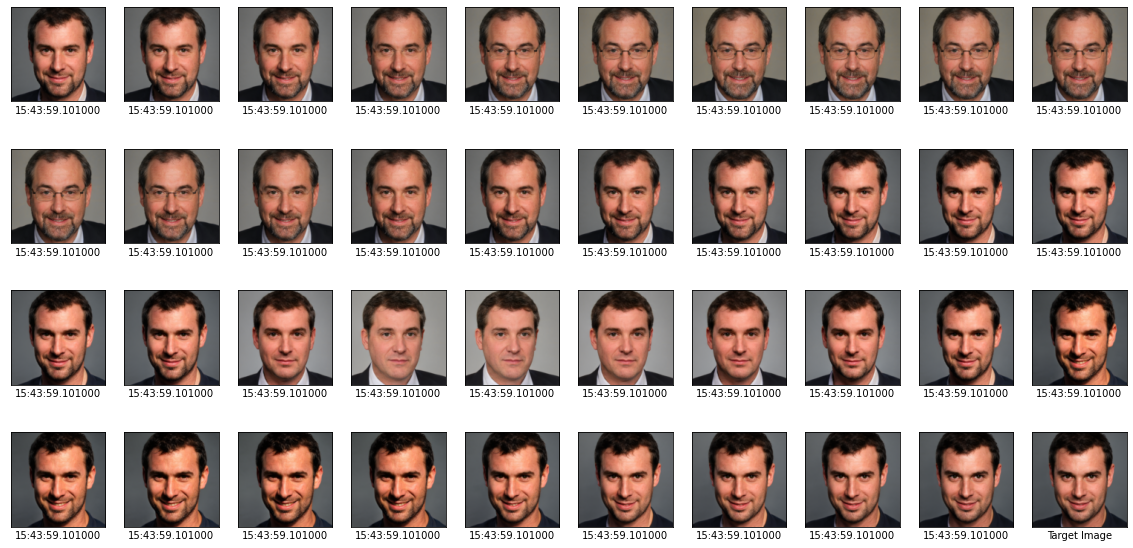

In [194]:
NUM = len(mock_edits)

print("NUM edits", NUM)

seed = 2813

fig, axes = plt.subplots(ncols=10, nrows=int(np.ceil((NUM+1) / 10)), figsize=(20, 10), squeeze=True)
axes = axes.reshape(-1)

i = 0

cum_edits = [mock_edits[0]]

for e in mock_edits:
	cum_edits = [old_edit for old_edit in cum_edits if old_edit['id'] != e['id']]
	cum_edits.append(e)

	user_img = image_generator.generate_image(edits=cum_edits, seed=seed, size=128)
	axes[i].imshow(user_img)
	axes[i].set_xticks([])
	axes[i].set_yticks([])
	axes[i].set_visible(True)

	axes[i].set_xlabel(pd.to_datetime(int(gi), unit='ms').strftime('%H:%M:%S.%f'))
	i = i+1

targ_img = image_generator.generate_image(edits=[
	{"id": 0, "value": -3},
	{"id": 1, "value": 1.6},
	{"id": 2, "value": -0.5},
	{"id": 3, "value": 1.0},
	{"id": 4, "value": -1.8}
], seed=seed, size=128)

axes[NUM].imshow(targ_img)
axes[NUM].set_xticks([])
axes[NUM].set_yticks([])
axes[NUM].set_visible(True)
axes[NUM].set_xlabel("Target Image")